***
## Hex is Hexadecimal (16進制)
***

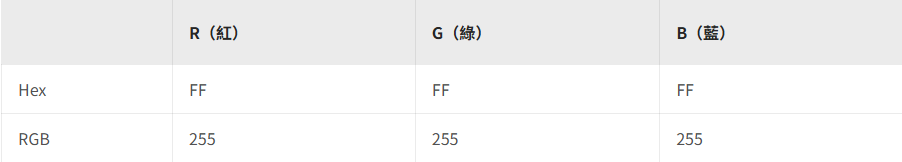

In [1]:
# The mapping relation between Hex and RGB
import pandas as pd
pd.Series([hex(k) for k in range(16**2)],index = list(range(16**2))).tail(10)

246    0xf6
247    0xf7
248    0xf8
249    0xf9
250    0xfa
251    0xfb
252    0xfc
253    0xfd
254    0xfe
255    0xff
dtype: object

## RGB (Red Green Blue) color Model
Each color components is typically represented  
by an integer in the range 0 ~ 255 (8 bits color depth)
$
\begin{align}    
\hbox{Pure Red} &= (255,0,0) \nonumber \\
\hbox{Pure Green} &= (0,255,0) \nonumber \\ 
\hbox{Pure Blue} &= (0,0,255) \nonumber \\
\hbox{White} &= (255,255,255) \nonumber \\
\hbox{Black} &= (0,0,0) \nonumber \\
\hbox{Gray} &= (128,128,128) \nonumber
\end{align}
$
The formula for the perceived brightness (luminance) L:
$$L=0.2126R+0.7152G+0.0722B$$

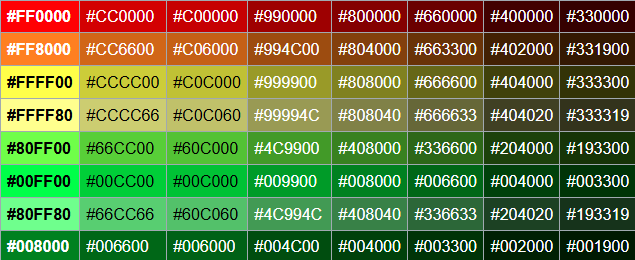

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
def rgbToInt(rgb):
    unit = [256**k for k in range(3)]
    # RGB顏色
    colorInt = sum(i*j for i,j in zip(unit,rgb))
    return colorInt

***
## Number to Column Alphabet
***

In [3]:
import xlsxwriter
','.join([xlsxwriter.utility.xl_col_to_name(k) for k in range(27)])

'A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,AA'

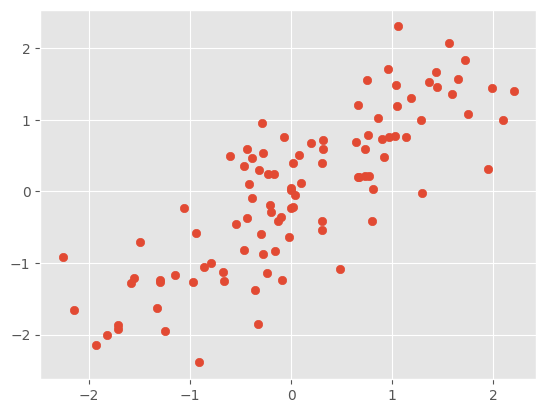

In [9]:
# Generate 2 dim Normal with Numpy
mu = [0,0]
Sigma = [[1,0.8],[0.8,1]]
n = 100
x,y = np.random.multivariate_normal(mu,Sigma,n).T
plt.scatter(x,y)

In [10]:
import win32com.client as win32
# '檔案路徑
path = r'C:\Users\User\Desktop\北大統計-授課資料\113-2 日間部-Python程式設計\VBA Sample\Sample 1 for VBA.xlsm'
# 開啟 Excel
excel = win32.gencache.EnsureDispatch('Excel.Application')
# 關閉顯示視窗 + 警告 + 更新
excel.Visible = True
excel.DisplayAlerts = False
excel.AskToUpdateLinks = False
# 開啟檔案
wb = excel.Workbooks.Open(path)
sht3 = wb.Worksheets("S3")
# 跳到目標 sheet
sht3.Activate()
# 將欄位填色
sht3.Range('A1:B1').Interior.Color = rgbToInt((255,255,0))
# 將生成數據填入Excel的儲存格
sht3.Range(f"A2:A{n+1}").Value = [[k] for k in x]
sht3.Range(f"B2:B{n+1}").Value = [[k] for k in y]
# 對格子要求單位
sht3.Columns("A:B").NumberFormat = '0.00;[紅色]-0.00;-'
sht3.Range("D2:E2").NumberFormat = '0.00;[紅色]-0.00;-'
# 執行 VBA 巨集
excel.Application.Run("Module4.coefReg")
# 置中對齊
sht3.Columns.AutoFit()
sht3.Columns.HorizontalAlignment = win32.constants.xlCenter
# 存檔並關閉 Excel 
wb.Save()
# excel.Quit()